# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [95]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_study_data = pd.merge(study_results, mouse_metadata, how="left", on=["Mouse ID", "Mouse ID"])


# Display the data table for preview
mouse_study_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [96]:
# Checking the number of mice.
mice_count = mouse_study_data["Mouse ID"].nunique()
mice_count

249

In [97]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_data = mouse_study_data.loc[mouse_study_data.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicate_data

array(['g989'], dtype=object)

In [98]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice_df = mouse_study_data.loc[mouse_study_data['Mouse ID'] == 'g989', :]
duplicate_mice_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [99]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mice_df = mouse_study_data[~mouse_study_data['Mouse ID'].str.contains('g989')]
clean_mice_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [100]:
# Checking the number of mice in the clean DataFrame.
clean_mice_count = clean_mice_df["Mouse ID"].nunique()
clean_mice_count

248

## Summary Statistics

In [101]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
regimen = clean_mice_df['Drug Regimen'].unique()
mean_vol = clean_mice_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].mean()
median_vol = clean_mice_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].median()
var_vol = clean_mice_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].var()
std_vol = clean_mice_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].std()
std_err_vol = clean_mice_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].sem()
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
mice_tumor_summary = pd.DataFrame({
        'Mean Tumor Volume': mean_vol,
        'Median Tumor Volume': median_vol,
        'Tumor Volume Variance': var_vol,
        'Tumor Volume Std. Dev.': std_vol,
        'Tumor Volume Std. Err.': std_err_vol
})
mice_tumor_summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [102]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
mice_tumor_summary_df = clean_mice_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].aggregate(['mean', 'median', 'var', 'std', 'sem'])
mice_tumor_summary_df

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

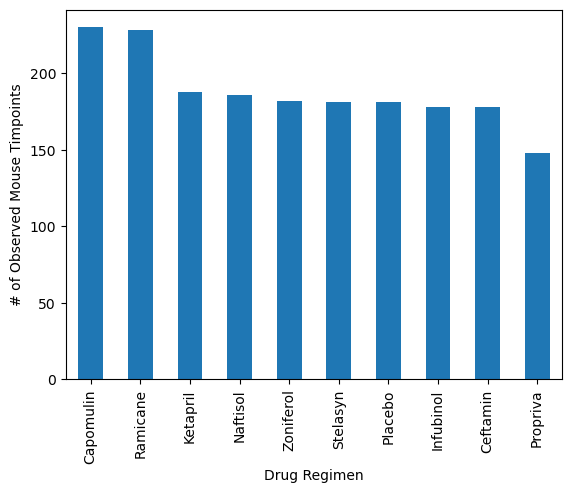

In [103]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

mice_and_timepoint = clean_mice_df['Drug Regimen'].value_counts()
bar_plot = mice_and_timepoint.plot.bar(
                                   xlabel="Drug Regimen",
                                   ylabel="# of Observed Mouse Timpoints")
plt.show()

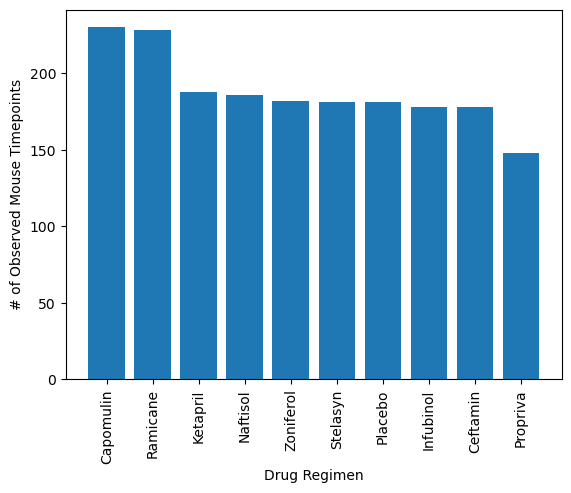

In [104]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = mice_and_timepoint.index.values
y_axis = mice_and_timepoint.values

plt.bar(x_axis, y_axis, align='center')
plt.xlabel("Drug Regimen")
plt.xticks(rotation='vertical')
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()

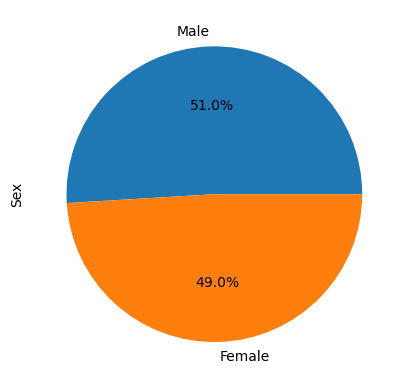

In [105]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mice_sex = clean_mice_df['Sex'].value_counts()
pie_chart = mice_sex.plot.pie(autopct="%1.1f%%")
plt.show()

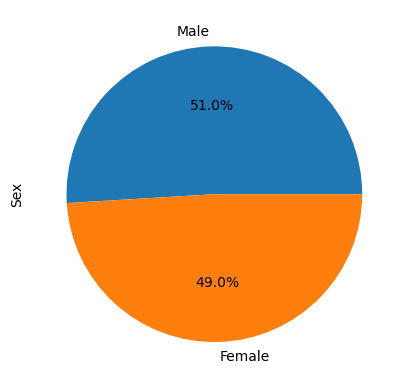

In [106]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ['Male', 'Female']
plt.pie(mice_sex, labels=labels, autopct="%1.1f%%",
        )
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [107]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
mouse = mouse_study_data.groupby(['Mouse ID']).max()
mouse_reset = mouse.reset_index()

mouse_data_df = mouse_reset[['Mouse ID', 'Timepoint']]\
    .merge(mouse_study_data, on=['Mouse ID', 'Timepoint'], how="left")

def outliers(regimen):
    regimen_data = mouse_data_df.loc[mouse_data_df["Drug Regimen"] == regimen]['Tumor Volume (mm3)']
    
    quartiles = regimen_data.quantile([.25,.5,.75])
    quart_first = quartiles[0.25]
    quart_last = quartiles[0.75]
    quart_range = quart_last - quart_first
    lower_bound = quart_first - (1.5 * quart_range)
    upper_bound = quart_last + (1.5 * quart_range)

    outliers = regimen_data.loc[(regimen_data < lower_bound) | (regimen_data > upper_bound)]
    print(f"{regimen}'s potential outliers:{outliers}")
    return regimen_data
    
capomulin = outliers("Capomulin")
ramicane = outliers("Ramicane")
infubinol = outliers("Infubinol")
ceftamin = outliers("Ceftamin")

Capomulin's potential outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers:31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)


In [108]:
# Put treatments into a list for for loop (and later for plot labels)
drug_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
drug = mouse_study_data[mouse_study_data["Drug Regimen"].isin(drug_list)]
# Create empty list to fill with tumor vol data (for plotting)
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset 
    # Determine outliers using upper and lower bounds
last_timepoint = drug.groupby(["Drug Regimen", "Mouse ID"])\
    .agg(tumor_size=("Tumor Volume (mm3)", lambda x: x.iloc[-1]))
last_timepoint = last_timepoint.stack(level=0).unstack(level=0)

treatment = 0
for drug in drug_list:
    quartiles = last_timepoint[drug].quantile([.25,.5,.75]).round(2)
    lowerq = quartiles[0.25].round(2)
    upperq = quartiles[0.75].round(2)
    iqr = round(upperq-lowerq,2)
    lower_bound = round(lowerq - (1.5*iqr),2)
    upper_bound = round(upperq + (1.5*iqr),2)


    if treatment == 0:
        print("------------------------------------------------------------")
    print(f"The lower quartile of {drug} treatments is: {lowerq}")
    print(f"The upper quartile of {drug} treatments is: {upperq}")
    print(f"The interquartile range of {drug} treatments is: {iqr}")
    print(f"Values below {lower_bound} could be {drug} outliers.")
    print(f"Values above {upper_bound} could be {drug} outliers.")
    print("------------------------------------------------------------")
    treatment += 1


------------------------------------------------------------
The lower quartile of Capomulin treatments is: 32.38
The upper quartile of Capomulin treatments is: 40.16
The interquartile range of Capomulin treatments is: 7.78
Values below 20.71 could be Capomulin outliers.
Values above 51.83 could be Capomulin outliers.
------------------------------------------------------------
The lower quartile of Ramicane treatments is: 31.56
The upper quartile of Ramicane treatments is: 40.66
The interquartile range of Ramicane treatments is: 9.1
Values below 17.91 could be Ramicane outliers.
Values above 54.31 could be Ramicane outliers.
------------------------------------------------------------
The lower quartile of Infubinol treatments is: 54.05
The upper quartile of Infubinol treatments is: 65.53
The interquartile range of Infubinol treatments is: 11.48
Values below 36.83 could be Infubinol outliers.
Values above 82.75 could be Infubinol outliers.
---------------------------------------------

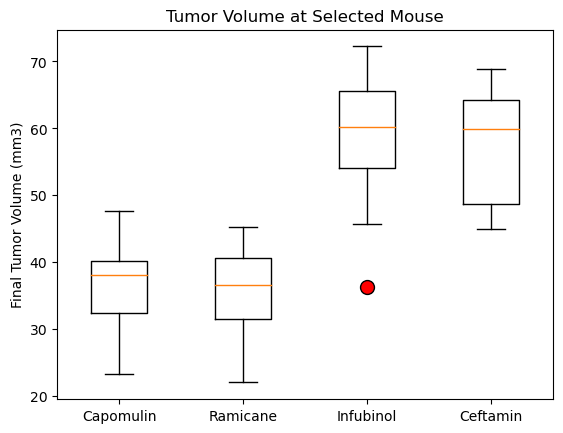

In [109]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
dot = dict(markerfacecolor = "red", markersize=10)
plt.boxplot([capomulin, ramicane, infubinol, ceftamin],labels=["Capomulin","Ramicane","Infubinol","Ceftamin"],flierprops= dot)
plt.ylabel("Final Tumor Volume (mm3)")
plt.title("Tumor Volume at Selected Mouse")
plt.show()

## Line and Scatter Plots

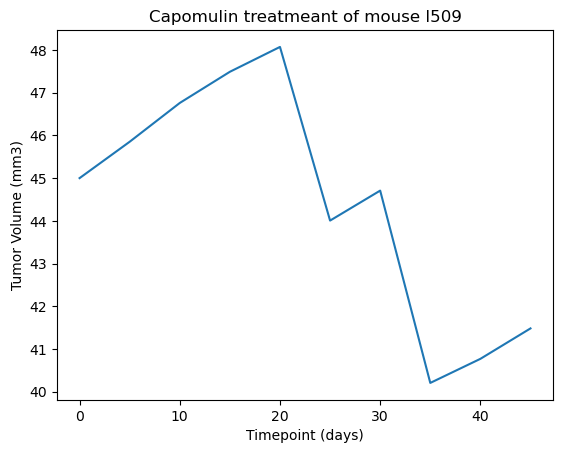

In [110]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin__drug_df = clean_mice_df.loc[clean_mice_df["Drug Regimen"] == "Capomulin",:]

line_df = capomulin__drug_df.loc[capomulin__drug_df["Mouse ID"] == "l509",:]
timepoint_days = line_df["Timepoint"]
tumor_vol_size = line_df["Tumor Volume (mm3)"]

plt.title('Capomulin treatmeant of mouse l509')
plt.plot(timepoint_days, tumor_vol_size)
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

C:\Users\Joe\AppData\Local\Temp\ipykernel_25340\134824378.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  capomulin_vol_mean = capomulin__drug_df.groupby(['Mouse ID']).mean()


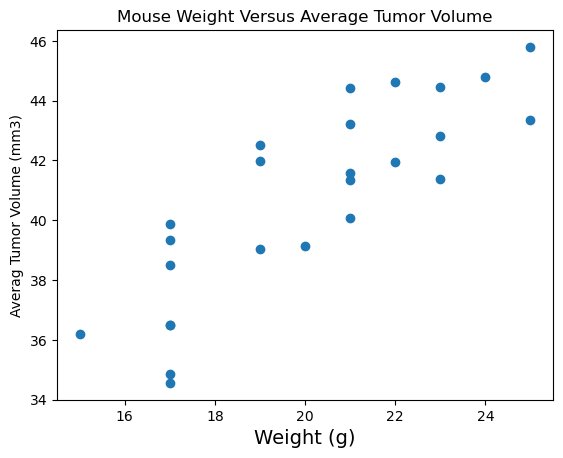

In [111]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_vol_mean = capomulin__drug_df.groupby(['Mouse ID']).mean()

plt.scatter(capomulin_vol_mean['Weight (g)'], capomulin_vol_mean['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)',fontsize =14)
plt.ylabel('Averag Tumor Volume (mm3)')
plt.title('Mouse Weight Versus Average Tumor Volume')
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


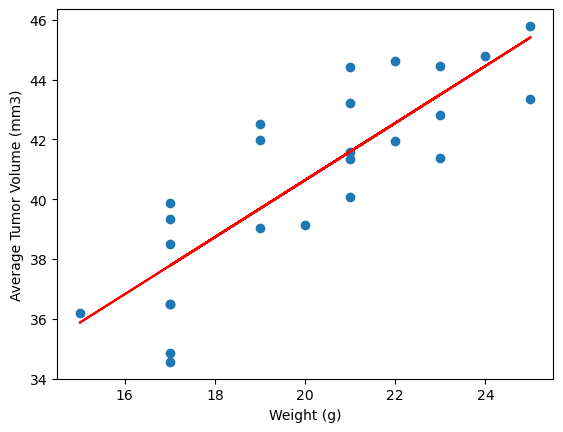

In [112]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation = st.pearsonr(capomulin_vol_mean['Weight (g)'], capomulin_vol_mean['Tumor Volume (mm3)'])

(slope, intercept,rvalue, pvalue, stderr)=st.linregress(capomulin_vol_mean["Weight (g)"], capomulin_vol_mean["Tumor Volume (mm3)"])
regress_values = capomulin_vol_mean["Weight (g)"]* slope + intercept
line_eq= (f"y = {round(slope, 2)} x + {round(intercept, 2)}")

print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")
plt.scatter(capomulin_vol_mean["Weight (g)"],capomulin_vol_mean["Tumor Volume (mm3)"])
plt.plot(capomulin_vol_mean["Weight (g)"], regress_values, color='red')
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()